In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

from matplotlib.ticker import MultipleLocator

%matplotlib inline

In [9]:

df = pd.read_csv('per_minute.csv')

total_messages_per_minute = pd.DataFrame({
    'minute': df['minute'],
    'message_count': df['total']
})

member_messages_per_minute = pd.DataFrame({
    'minute': df['minute'],
    'message_count': df['member']
})


moving_average = pd.DataFrame({
    'minute': df['minute'],
    'message_count': df['mv10']
})


In [10]:
time_labels = pd.to_datetime(total_messages_per_minute['minute'], unit='m').dt.strftime('%H:%M')

time_labels_10min = time_labels[::10]
minutes_10min = total_messages_per_minute['minute'][::10]

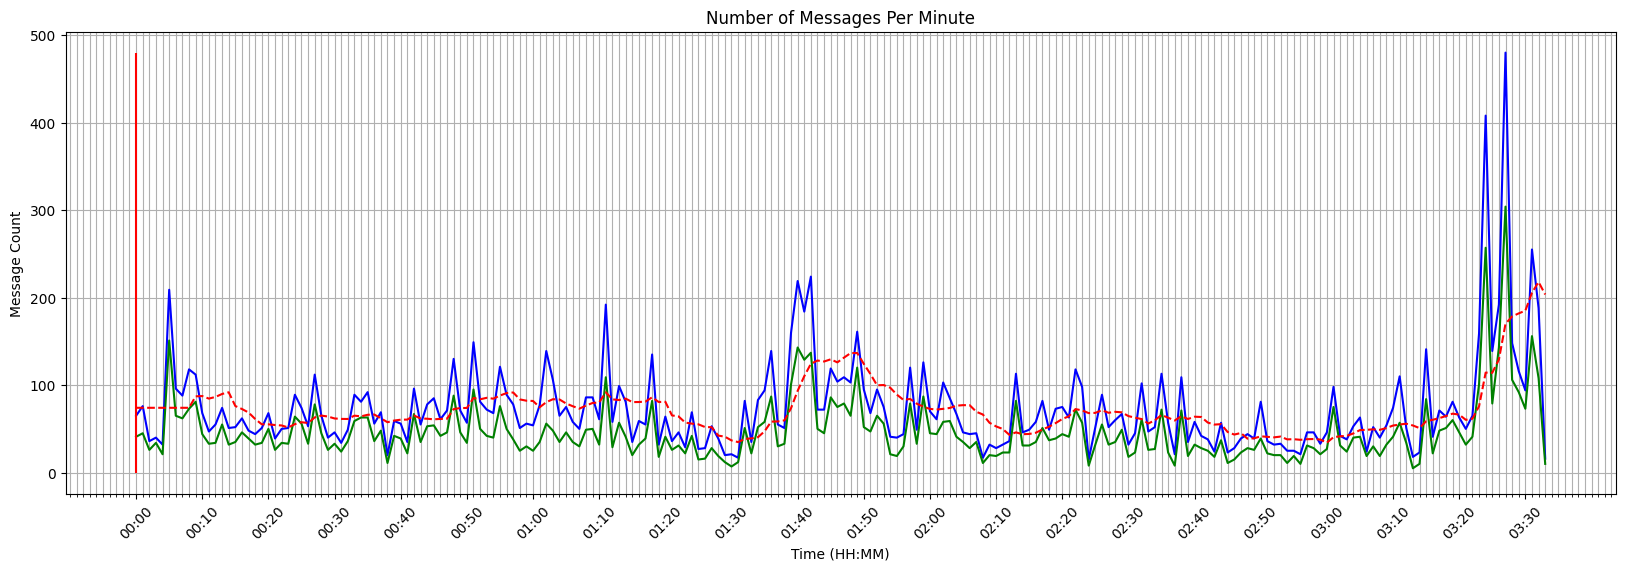

In [11]:
plt.figure(figsize=(20, 6))

plt.plot(total_messages_per_minute['minute'], total_messages_per_minute['message_count'], label='Total Messages', color='blue')

plt.plot(member_messages_per_minute['minute'], member_messages_per_minute['message_count'], label='Member Messages', color='green')

plt.plot(moving_average['minute'], moving_average['message_count'], label="Moving Average", color='red', linestyle='--')

plt.vlines(0, ymin=0, ymax=total_messages_per_minute['message_count'].max(), colors='red')

plt.xticks(ticks=minutes_10min, labels=time_labels_10min, rotation=45)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
plt.xlabel('Time (HH:MM)')
plt.ylabel('Message Count')
plt.title('Number of Messages Per Minute')

plt.grid(True, which='both')
plt.show()